<a href="https://colab.research.google.com/github/angelesGladin/challenge-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [43]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto     Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos 164,300.00        6,900.00   
1    Mesa de comedor                Muebles 192,300.00        8,400.00   
2      Juego de mesa               Juguetes 209,600.00       15,900.00   
3         Microondas      Electrodom√©sticos 757,500.00       41,000.00   
4   Silla de oficina                Muebles 335,200.00       20,200.00   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas   lat    lon  
0  Tarjeta de cr√©dito                   8  4.61 -74.08  
1  Tarjeta de cr√©dito                   4  6.25 -75.56  
2  Tarjeta de cr√©dito                   1 10.40 -75.51  
3               Nequi                   1  3.44 -76.52  
4               Nequi                   1  6.25 -75.56

In [ ]:
#insatalacion herramienta seaborn para estilizar gr√°ficas
!pip install seaborn

#1. An√°lisis de facturaci√≥n



In [ ]:
#funci√≥n para contar productos por PRECIO y conviertiendolo a Df
def ingresos_precios(df, nombre_tienda):
    suma_tiendas = df['Precio'].sum()
    cantidad = len(df)
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Ingreso Total' : [suma_tiendas]})

#aplicar a la funcion por cada tienda
c1 = ingresos_precios(tienda, 'Tienda 1')
c2 = ingresos_precios(tienda2, 'Tienda 2')
c3 = ingresos_precios(tienda3, 'Tienda 3')
c4 = ingresos_precios(tienda4, 'Tienda 4')

#uniendo todo para gr√°ficar
total_suma = pd.concat([c1, c2, c3, c4], ignore_index=True)
pd.options.display.float_format = '{:,.2f}'.format
total_suma

Tienda  Conteo    Ingreso Total
0  Tienda 1    2359 1,150,880,400.00
1  Tienda 2    2359 1,116,343,500.00
2  Tienda 3    2359 1,098,019,600.00
3  Tienda 4    2358 1,038,375,700.00

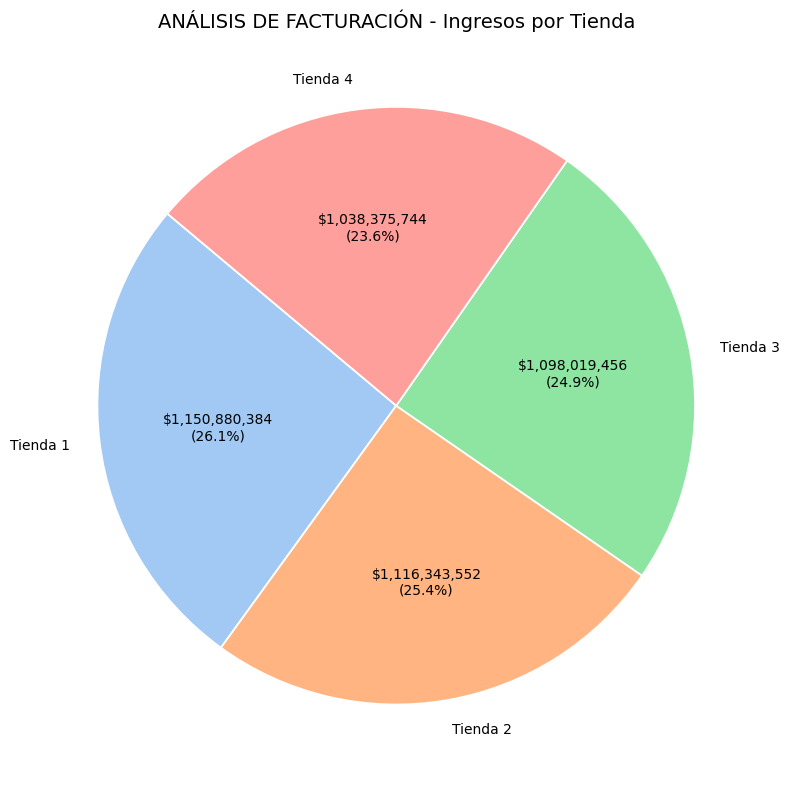

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos base
labels = total_suma['Tienda']
sizes = total_suma['Ingreso Total']

# Funci√≥n para mostrar valores con formato moneda
def formato_monto(pct, all_vals):
    valor_absoluto = int(pct / 100 * sum(all_vals))
    return f'${valor_absoluto:,.0f}\n({pct:.1f}%)'

colors = sns.color_palette('pastel')
# Crear gr√°fico
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda pct: formato_monto(pct, sizes), startangle=140, colors=colors, shadow=False, wedgeprops={'edgecolor': 'white', 'linewidth': 1.3})

plt.title('AN√ÅLISIS DE FACTURACI√ìN - Ingresos por Tienda', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

In [ ]:
#funci√≥n para contar productos por categoria y conviertiendolo a Df
def conteo_categoria(df, nombre_tienda):
    conteo = df.groupby('Categor√≠a del Producto').size().reset_index(name ='Cantidad')
    conteo['Tienda'] = nombre_tienda
    return conteo

#aplicar a la funcion por cada tienda
t1 = conteo_categoria(tienda, 'Tienda 1')
t2 = conteo_categoria(tienda2, 'Tienda 2')
t3 = conteo_categoria(tienda3, 'Tienda 3')
t4 = conteo_categoria(tienda4, 'Tienda 4')

#uniendo todo para gr√°ficar
total = pd.concat([t1, t2, t3, t4], ignore_index=True)
total


Categor√≠a del Producto  Cantidad    Tienda
0   Art√≠culos para el hogar       171  Tienda 1
1      Deportes y diversi√≥n       284  Tienda 1
2         Electrodom√©sticos       312  Tienda 1
3              Electr√≥nicos       448  Tienda 1
4    Instrumentos musicales       182  Tienda 1
5                  Juguetes       324  Tienda 1
6                    Libros       173  Tienda 1
7                   Muebles       465  Tienda 1
8   Art√≠culos para el hogar       181  Tienda 2
9      Deportes y diversi√≥n       275  Tienda 2
10        Electrodom√©sticos       305  Tienda 2
11             Electr√≥nicos       422  Tienda 2
12   Instrumentos musicales       224  Tienda 2
13                 Juguetes       313  Tienda 2
14                   Libros       197  Tienda 2
15                  Muebles       442  Tienda 2
16  Art√≠culos para el hogar       177  Tienda 3
17     Deportes y diversi√≥n       277  Tienda 3
18        Electrodom√©sticos       278  Tienda 3
19             Electr√≥nicos       451  Tienda 3
20   Instrumentos musicales       177  Tienda 3
21                 Juguetes       315  Tienda 3
22                   Libros       185  Tienda 3
23                  Muebles       499  Tienda 3
24  Art√≠culos para el hogar       201  Tienda 4
25     Deportes y diversi√≥n       277  Tienda 4
26        Electrodom√©sticos       254  Tienda 4
27             Electr√≥nicos       451  Tienda 4
28   Instrumentos musicales       170  Tienda 4
29                 Juguetes       338  Tienda 4
30                   Libros       187  Tienda 4
31                  Muebles       480  Tienda 4

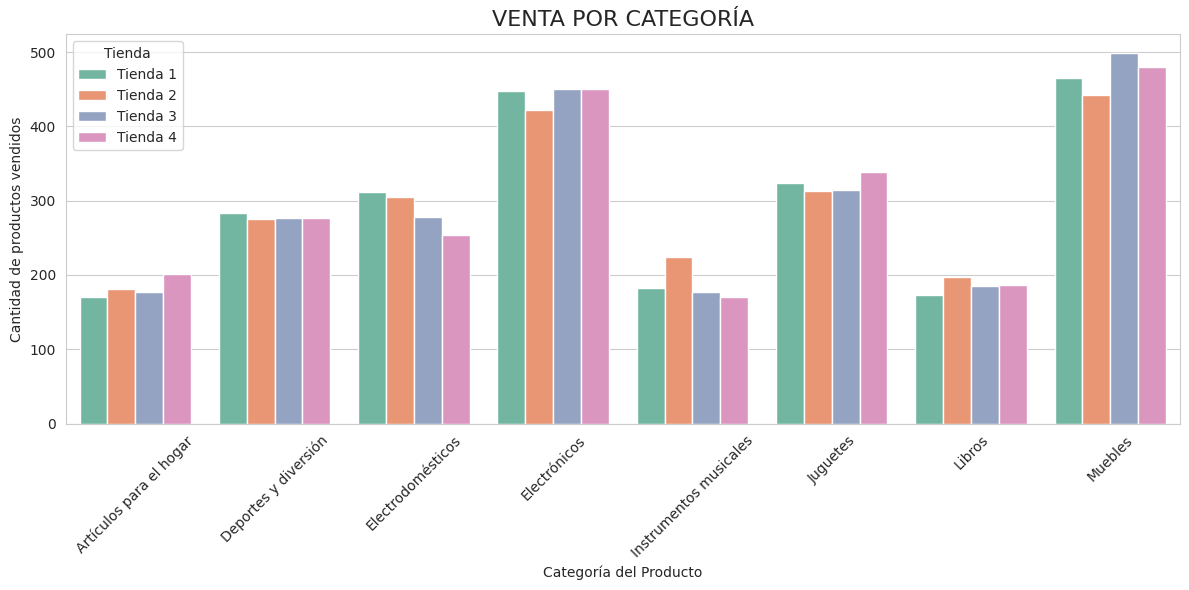

In [ ]:
#creaci√≥n de gr√°fico con seaborn para estilizar gr√°fica
import seaborn as sns
import matplotlib.pyplot as plt

#Dise√±o de la gr√°fica
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data= total, x='Categor√≠a del Producto', y='Cantidad', hue='Tienda', palette='Set2')

plt.title('VENTA POR CATEGOR√çA', fontsize=16)
plt.xlabel('Categor√≠a del Producto')
plt.ylabel('Cantidad de productos vendidos')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificaci√≥n promedio de la tienda


In [ ]:
#funci√≥n para calcular promedio
def promedio_tienda(df, nombre_tienda):
    cantidad = len(df)
    suma_promedio = df['Calificaci√≥n'].sum()/cantidad
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Promedio' : [suma_promedio]})

#Asignar funci√≥n a cada tienda
p1 = promedio_tienda(tienda, 'Tienda 1')
p2 = promedio_tienda(tienda2, 'Tienda 2')
p3 = promedio_tienda(tienda3, 'Tienda 3')
p4 = promedio_tienda(tienda4, 'Tienda 4')

#Concatenaci√≥n
total_promedio = pd.concat([p1, p2, p3, p4], ignore_index=True)
total_promedio

Tienda  Conteo  Promedio
0  Tienda 1    2359      3.98
1  Tienda 2    2359      4.04
2  Tienda 3    2359      4.05
3  Tienda 4    2358      4.00

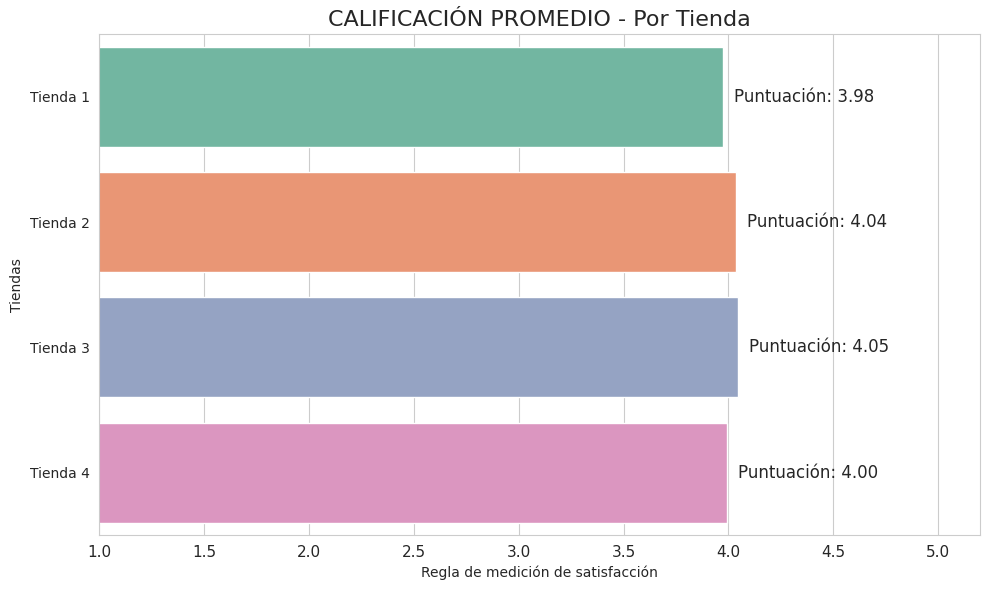

In [ ]:
# Creaci√≥n gr√°fica del promedio con barras horizontales
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo y tama√±o de la figura
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=total_promedio, y='Tienda', x='Promedio', hue='Tienda', legend=False, palette='Set2')

# T√≠tulo y etiquetas
plt.title('CALIFICACI√ìN PROMEDIO - Por Tienda', fontsize=16)
plt.xlabel('Regla de medici√≥n de satisfacci√≥n')
plt.ylabel('Tiendas')
plt.xticks(ticks=[x * 0.5 for x in range(2, 11)], fontsize=11)
plt.xlim(1, 5.2)

# Mostrar valores al final de cada barra
for i, valor in enumerate(total_promedio['Promedio']):
    ax.text(valor + 0.05, i, f'Puntuaci√≥n: {valor:,.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

In [42]:
#funci√≥n para contabilizar productos
def productos_tienda(df, nombre_tienda):
    conteo_productos = df['Producto'].value_counts()
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()
    return pd.DataFrame({'Tienda' : [nombre_tienda], 'Producto m√°s vendido' : [mas_vendido], 'Producto menos vendido' : [menos_vendido]})

#Aplicar a la funcion por cada tienda
m1 = productos_tienda(tienda, 'Tienda 1')
m2 = productos_tienda(tienda2, 'Tienda 2')
m3 = productos_tienda(tienda3, 'Tienda 3')
m4 = productos_tienda(tienda4, 'Tienda 4')

#Concatenaci√≥n
productos_mas_menos_vendidos = pd.concat([m1, m2, m3, m4], ignore_index=True)
productos_mas_menos_vendidos

Tienda       Producto m√°s vendido     Producto menos vendido
0  Tienda 1                 Microondas  Auriculares con micr√≥fono
1  Tienda 2  Iniciando en programaci√≥n              Juego de mesa
2  Tienda 3              Kit de bancas    Bloques de construcci√≥n
3  Tienda 4                   Cama box         Guitarra el√©ctrica

# 5. Env√≠o promedio por tienda

In [ ]:
#funci√≥n para calcular promedio del env√≠o de cada tienda
def promedio_tienda_envio(df, nombre_tienda):
    contador_envio = len(df)
    suma_promedio_envio = df['Costo de env√≠o'].sum()/contador_envio
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [contador_envio], 'Promedio' : [suma_promedio_envio]})

#Aplicaci√≥n de la funci√≥n a todas las tiendas

e1 = promedio_tienda_envio(tienda, 'Tienda 1')
e2 = promedio_tienda_envio(tienda2, 'Tienda 2')
e3 = promedio_tienda_envio(tienda3, 'Tienda 3')
e4 = promedio_tienda_envio(tienda4, 'Tienda 4')

#concatenaci√≥n
promedio_envios = pd.concat([e1, e2, e3, e4], ignore_index=True)
promedio_envios

Tienda  Conteo  Promedio
0  Tienda 1    2359 26,018.61
1  Tienda 2    2359 25,216.24
2  Tienda 3    2359 24,805.68
3  Tienda 4    2358 23,459.46

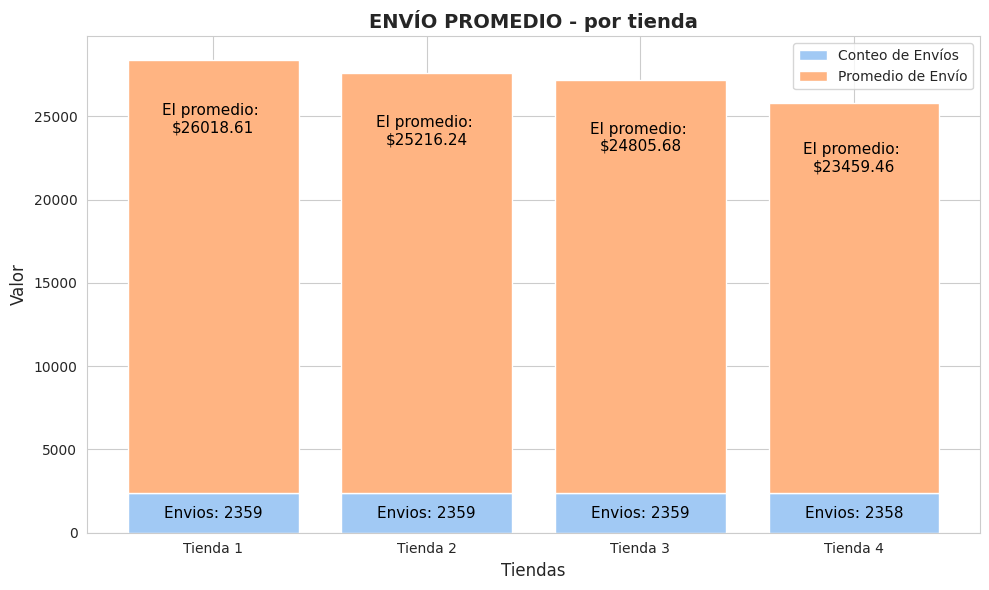

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(10,6))

# Datos base
tiendas = promedio_envios['Tienda']
conteo = promedio_envios['Conteo']
promedio = promedio_envios['Promedio']
ax.bar(tiendas, conteo, label='Conteo de Env√≠os')
ax.bar(tiendas, promedio, bottom=conteo, label='Promedio de Env√≠o')

# Mostrar valores en cada secci√≥n de la barra
for i in range(len(promedio_envios)):
    tienda = tiendas[i]
    c = conteo[i]
    p = promedio[i]

    # Texto sobre la barra de Conteo
    ax.text(i, c / 2, f'Envios: {c:.0f}', ha='center', va='center', color='black', fontsize=11)

    # Texto sobre la parte superior del Promedio
    top = c + p
    ax.text(i, top - (p * 0.1), f'El promedio: \n${p:.2f}', ha='center', va='top', color='black', fontsize=11)

# T√≠tulos y etiquetas
ax.set_title('ENV√çO PROMEDIO - por tienda', fontsize=14, fontweight='bold')
ax.set_xlabel('Tiendas', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_xticks(range(len(tiendas)))
ax.set_xticklabels(tiendas)
ax.legend()
plt.tight_layout()
plt.show()

**<center>INFORME FINAL</CENTER>**

üìä Informe de An√°lisis Comparativo de Tiendas
üìå Introducci√≥n
El prop√≥sito de este informe es realizar un an√°lisis comparativo del desempe√±o de cuatro tiendas, con el fin de identificar cu√°l de ellas representa la mejor oportunidad para enfocar las estrategias de venta. Para ello, se evaluaron distintos aspectos clave como los ingresos totales, categor√≠as m√°s y menos vendidas, calificaciones promedio de los clientes, productos m√°s y menos vendidos y costos de env√≠o. Este an√°lisis se apoya tanto en los datos proporcionados como en las visualizaciones generadas.

üìà Desarrollo
1. üßæ Ingresos Totales por Tienda

Tienda	Conteo de Ventas	Ingreso Total
Tienda 1	2,359	$1,150,880,400.00
Tienda 2	2,359	$1,116,343,500.00
Tienda 3	2,359	$1,098,019,600.00
Tienda 4	2,358	$1,038,375,700.00
An√°lisis:
Tienda 1 lidera en ingresos totales, lo que sugiere un excelente desempe√±o comercial. Aunque las dem√°s tiendas tienen un n√∫mero similar de ventas, el monto recaudado por Tienda 1 es significativamente mayor, lo que podr√≠a deberse a productos de mayor valor o a una mejor gesti√≥n comercial.

2. üõçÔ∏è Categor√≠as M√°s y Menos Vendidas
Categor√≠a m√°s vendida en todas las tiendas:
‚û°Ô∏è Muebles

Categor√≠a menos vendida por tienda:


Tienda	Categor√≠a menos vendida
Tienda 1	Art√≠culos para el hogar (171)
Tienda 2	Art√≠culos para el hogar (181)
Tienda 3	Instrumentos musicales (177)
Tienda 4	Instrumentos musicales (170)
An√°lisis:
La consistencia de la categor√≠a ‚ÄúMuebles‚Äù como la m√°s vendida resalta una tendencia del consumidor. Por otro lado, ‚ÄúArt√≠culos para el hogar‚Äù e ‚ÄúInstrumentos musicales‚Äù presentan baja rotaci√≥n, lo que indica √°reas que pueden requerir ajustes en promoci√≥n o surtido.

3. ‚≠ê Calificaciones Promedio por Tienda

Tienda	Promedio de Calificaci√≥n
Tienda 1	3.98
Tienda 2	4.04
Tienda 3	4.05
Tienda 4	4.00
An√°lisis:
Tienda 3 presenta la mejor calificaci√≥n promedio, lo que refleja un mayor nivel de satisfacci√≥n por parte de los clientes. Aunque las diferencias son peque√±as, este aspecto podr√≠a ser crucial en decisiones de fidelizaci√≥n.

4. üéØ Productos M√°s y Menos Vendidos

Tienda	Producto M√°s Vendido	Producto Menos Vendido
Tienda 1	Microondas	Auriculares con micr√≥fono
Tienda 2	Iniciando en programaci√≥n	Juego de mesa
Tienda 3	Kit de bancas	Bloques de construcci√≥n
Tienda 4	Cama box	Guitarra el√©ctrica
An√°lisis:
Cada tienda muestra particularidades en sus productos estrella y de bajo desempe√±o. Esto sugiere diferentes perfiles de consumidor seg√∫n la tienda, lo cual es √∫til para definir estrategias de surtido personalizado.

5. üöö Costo de Env√≠o Promedio

Tienda	Promedio de Env√≠o
Tienda 1	$26,018.61
Tienda 2	$25,216.24
Tienda 3	$24,805.68
Tienda 4	$23,459.46
An√°lisis:
Tienda 4 destaca por tener el costo de env√≠o m√°s bajo. Aunque esto puede resultar atractivo para los clientes, es importante considerar si esto afecta el margen de ganancia. Tienda 1 tiene el env√≠o m√°s caro, aunque tambi√©n es la que m√°s ingresa.

‚úÖ Conclusi√≥n y Recomendaci√≥n
Tras el an√°lisis integral de los diferentes indicadores:

Tienda 1 lidera en ingresos totales, con un buen equilibrio de ventas y diversidad de productos vendidos, lo que sugiere una estrategia comercial efectiva.

Tienda 3 destaca en satisfacci√≥n del cliente, siendo la mejor calificada.

Tienda 4, aunque con menores ingresos, muestra eficiencia en el costo de env√≠o, lo cual podr√≠a aprovecharse en campa√±as de atracci√≥n de clientes.

üîé Recomendaci√≥n:
Se recomienda enfocar las estrategias de venta y expansi√≥n en la Tienda 1, ya que presenta una combinaci√≥n de alto volumen de ingresos, variedad de productos vendidos y buen desempe√±o general. Aunque la calificaci√≥n promedio no es la m√°s alta, se mantiene competitiva. Su capacidad para generar ingresos justifica posibles inversiones adicionales en log√≠stica (como mejorar costos de env√≠o) o atenci√≥n al cliente (para aumentar su puntuaci√≥n).

